In [1]:
# CNN FOR MNIST DATASETS
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.preprocessing import image
from matplotlib.pyplot import imshow
import numpy as np

C:\Users\smsaurabhv\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
 %matplotlib inline

In [4]:
shapeoftraindatasets =x_train.shape
train_example = shapeoftraindatasets[0]
heightofimage = shapeoftraindatasets[1]
widthofimage =shapeoftraindatasets[2]
print("shape of x_xtrain images")
print(shapeoftraindatasets)
print("total num of images in datasets")
print(train_example)
print("height of image")
print(heightofimage)
print("width of image")
print(widthofimage)

shape of x_xtrain images
(60000, 28, 28)
total num of images in datasets
60000
height of image
28
width of image
28


In [5]:
# print some pics from datasets
from matplotlib import pyplot as plt
fig = plt.figure()

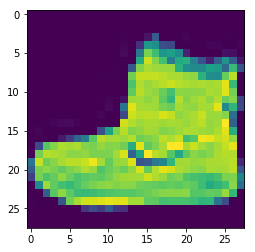

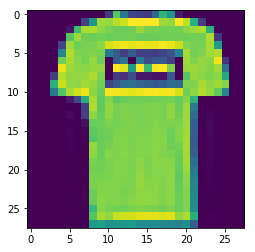

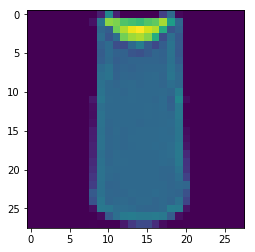

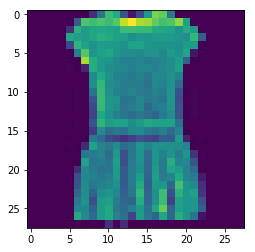

In [6]:
m=[]
for i  in range(4):
    plt.imshow(x_train[i], interpolation='nearest')
    m.append(x_train[i])
    plt.show()

In [7]:
print("y_train in images")
print(y_train)

y_train in images
[9 0 0 ... 3 0 5]


In [8]:
# normalizing images 
x_train = x_train/255.0
x_test = x_test/255.0
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [9]:
inputshape = x_train.shape[1:]
numclass=10

In [10]:
print(inputshape)
y_train = keras.utils.to_categorical(y_train, numclass)
y_test = keras.utils.to_categorical(y_test, numclass)
print(y_train.shape)
print(y_test.shape)


(28, 28, 1)
(60000, 10)
(10000, 10)


In [11]:
#define hyper parameters
batchsize=128
epoch=12


In [12]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=inputshape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(numclass, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batchsize,epochs=epoch,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 204s 3ms/step - loss: 0.5653 - acc: 0.7969 - val_loss: 0.3697 - val_acc: 0.8619
Epoch 2/12
60000/60000 [==============================] - 209s 3ms/step - loss: 0.3611 - acc: 0.8701 - val_loss: 0.3130 - val_acc: 0.8848
Epoch 3/12
60000/60000 [==============================] - 201s 3ms/step - loss: 0.3137 - acc: 0.8884 - val_loss: 0.2850 - val_acc: 0.8936
Epoch 4/12
60000/60000 [==============================] - 208s 3ms/step - loss: 0.2802 - acc: 0.8990 - val_loss: 0.2608 - val_acc: 0.9026
Epoch 5/12
60000/60000 [==============================] - 205s 3ms/step - loss: 0.2570 - acc: 0.9074 - val_loss: 0.2507 - val_acc: 0.9095
Epoch 6/12
60000/60000 [==============================] - 208s 3ms/step - loss: 0.2380 - acc: 0.9138 - val_loss: 0.2372 - val_acc: 0.9123
Epoch 7/12
60000/60000 [==============================] - 202s 3ms/step - loss: 0.2239 - acc: 0.9185 - val_loss: 0.2325 - 

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
_________________________________________________________________


In [44]:
dictobject ={
    "[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]":"T-shirt/top",
    "[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]":"Trouser",
    "[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]":"Pullover",
    "[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]":"Dress",
    "[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]":"Coat",
    "[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]":"Sandal",
    "[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]":"Shirt",
    "[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]":"Sneaker",
    "[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]":"bag",
    "[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]":"Ankle boot"
    
    
}

(28, 28, 3)
(1, 28, 28, 1)
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Pullover


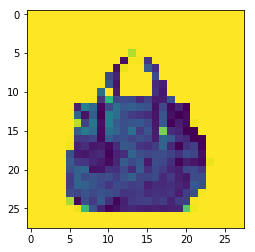

In [45]:
img_path = 'mnist1.jpg'
img = image.load_img(img_path, target_size=(28, 28))
x = np.array(image.img_to_array(img))
print(x.shape)
x=x[:,:,2]
imshow(x)
x=x.reshape(28,28,1)
x = np.expand_dims(x, axis=0)
print(x.shape)
print(model.predict(x))
try:
    print(dictobject[str(model.predict(x))])
except:
    print("no object trained")

(28, 28, 3)
(1, 28, 28, 1)
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
bag


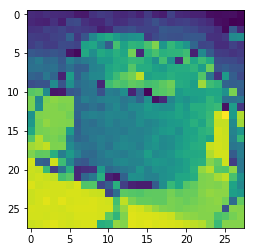

In [46]:
img_path = 'mnist2.jpg'
img = image.load_img(img_path, target_size=(28, 28))
x = np.array(image.img_to_array(img))
print(x.shape)
x=x[:,:,2]
imshow(x)
x=x.reshape(28,28,1)
x = np.expand_dims(x, axis=0)
print(x.shape)
print(model.predict(x))
try:
    print(dictobject[str(model.predict(x))])
except:
    print("no object trained")

(1, 28, 28, 1)
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]
bag


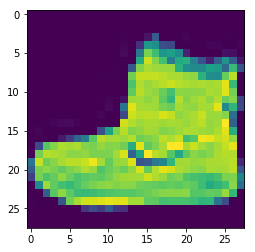

In [47]:
imshow(m[0])
x=x.reshape(28,28,1)
x = np.expand_dims(x, axis=0)
print(x.shape)
print(model.predict(x))
try:
    print(dictobject[str(model.predict(x))])
except:
    print("no object trained")

(28, 28, 3)
(1, 28, 28, 1)
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Pullover


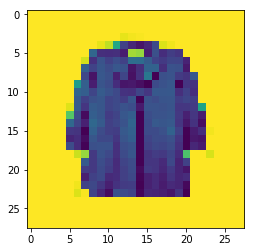

In [48]:
img_path = 'mnist5.jpg'
img = image.load_img(img_path, target_size=(28, 28))
x = np.array(image.img_to_array(img))
print(x.shape)
x=x[:,:,2]
imshow(x)
x=x.reshape(28,28,1)
x = np.expand_dims(x, axis=0)
print(x.shape)
print(model.predict(x))
try:
    print(dictobject[str(model.predict(x))])
except:
    print("no object trained")

(28, 28, 3)
(1, 28, 28, 1)
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
Pullover


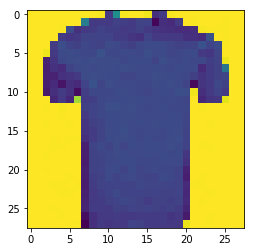

In [49]:
img_path = 'mnist6.jpg'
img = image.load_img(img_path, target_size=(28, 28))
x = np.array(image.img_to_array(img))
print(x.shape)
x=x[:,:,1]
imshow(x)
x=x.reshape(28,28,1)
x = np.expand_dims(x, axis=0)
print(x.shape)
print(model.predict(x))
try:
    print(dictobject[str(model.predict(x))])
except:
    print("no object trained")

(28, 28)
(1, 28, 28, 1)
[[1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 4.4532768e-24 0.0000000e+00 0.0000000e+00 0.0000000e+00]]
no object trained


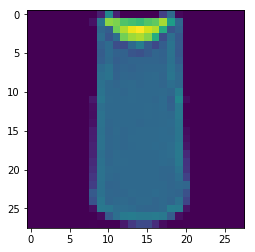

In [41]:
img_path = 'mnist7.jpg'
img = image.load_img(img_path, target_size=(28, 28))
x = m[2]
print(x.shape)
x=x[:,:]
imshow(x)
x=x.reshape(28,28,1)
x = np.expand_dims(x, axis=0)
print(x.shape)
print(model.predict(x))
try:
    print(dictobject[str(model.predict(x))])
except:
    print("no object trained")